## Evaluation Metrics for classification models

### 1. Logistic Regression on Titanic Dataset

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# import pandas as pd

# # Load Titanic dataset from a URL
# url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
# df = pd.read_csv(url)
# print(df.head())


# Load the Titanic dataset (replace with your actual dataset path)
df = pd.read_csv('titanic.csv')
print(df)

# Handle missing values
df['age'] = df['age'].fillna(df['age'].mean())  # Replace missing age with mean
df['fare'] = df['fare'].fillna(df['fare'].median())  # Replace missing fare with median
df = df.dropna(subset=['sex', 'class', 'embarked', 'survived'])  # Drop rows with missing critical data

# Handle infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

# Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define predictors and target
X = df[['age', 'sex', 'class', 'fare', 'embarked']]
y = df['survived']

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary
print(model.summary())


      age     sex  class      fare embarked  survived
0    34.5    male      3    7.8292        Q         0
1    47.0  female      3    7.0000        S         1
2    62.0    male      2    9.6875        Q         0
3    27.0    male      3    8.6625        S         0
4    22.0  female      3   12.2875        S         1
..    ...     ...    ...       ...      ...       ...
413   NaN    male      3    8.0500        S         0
414  39.0  female      1  108.9000        C         1
415  38.5    male      3    7.2500        S         0
416   NaN    male      3    8.0500        S         0
417   NaN    male      3   22.3583        C         0

[418 rows x 6 columns]
         Current function value: 69.133005
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  418
Model:                          Logit   Df Residuals:                      412
Method:                 

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\user\anaconda3\Lib\

This logistic regression output attempts to predict the probability of survival on the Titanic based on variables such as age, sex, class, fare, and embarked. Here's how to interpret the results:

### Key Observations:
1. **Dependent Variable**: 
   - `survived` is the binary dependent variable (1 = survived, 0 = did not survive).

2. **Model Fit**:
   - **Log-Likelihood**: The Log-Likelihood of -28898 indicates the model's goodness of fit. A less negative value would imply a better fit, but this is quite poor.
   - **Pseudo R-squared**: A value of -104.5 indicates a very poor model fit (values closer to 0 or positive are better).
   - **LL-Null and LL-Full**: The log-likelihood of the null model (`LL-Null`) and the fitted model (`Log-Likelihood`) are not meaningfully different, implying the predictors provide little improvement.

3. **Coefficients and Statistical Significance**:
   - The table shows coefficients (`coef`), standard errors (`std err`), and p-values (`P>|z|`), which indicate the effect size, variability, and statistical significance of each variable, respectively.
   - **const**: The intercept of -24.0485 is not significant (p = 0.477), meaning the baseline probability of survival is not meaningfully predicted by the model.
   - **age**: Coefficient of -1.9073 implies that older individuals are less likely to survive. However, it is not statistically significant (p = 0.231).
   - **sex**: Coefficient of 52.0419 suggests a strong association between gender and survival, with "female" possibly being strongly predictive of survival. Yet, it is not significant (p = 0.224).
   - **class**: Coefficient of 53.1711 indicates higher survival for certain passenger classes, but this too lacks significance (p = 0.189).
   - **fare**: Coefficient of 0.0830 implies a positive association between fare and survival, but this effect is not significant (p = 0.264).
   - **embarked**: Coefficient of 40.8708 indicates some relationship between embarkation point and survival, but it is not significant (p = 0.214).

4. **Convergence Warning**:
   - The model did not converge (`converged: False`), indicating that the estimation process was unsuccessful. This often happens when the data is poorly conditioned, variables are highly correlated, or the sample size is too small.

### Interpretation:
- The results suggest that the model is not capturing significant relationships between the predictors and survival. None of the predictors are statistically significant (p > 0.05), and the model fit metrics (Pseudo R-squared, Log-Likelihood) indicate poor performance.
- The lack of convergence is a critical issue that undermines the reliability of the output.


### Summary
The logistic regression model was fitted to predict Titanic survival based on age, sex, class, fare, and embarkation port. However, the model’s performance was poor, as indicated by the highly negative Pseudo R-squared value (-104.5) and minimal difference between the log-likelihood of the null and fitted models. Additionally, the model failed to converge, which suggests challenges with the data or the estimation process. These issues indicate that the predictors used do not adequately explain the variability in survival outcomes.

None of the predictors were statistically significant, as all p-values exceeded 0.05. For instance, the coefficients for sex (52.0419), class (53.1711), and age (-1.9073) suggested potential relationships with survival, but the high standard errors and non-significant p-values undermine confidence in these effects. Similarly, fare and embarkation point showed weak and statistically insignificant associations with survival. These results suggest that the predictors, while theoretically relevant, did not provide strong evidence for their influence on survival in this model.

The model's poor fit and lack of statistical significance across predictors highlight potential data issues or limitations in the chosen modeling approach. Future analysis could involve addressing data scaling, checking for multicollinearity, and ensuring adequate sample size relative to the predictors. Alternative models, such as decision trees or ensemble methods, may also yield better insights into the factors influencing Titanic survival.








### confusion matrix

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Generate predictions
predicted_probs = model.predict(X)  # Predicted probabilities
predicted_classes = (predicted_probs >= 0.5).astype(int)  # Convert to binary classes (threshold 0.5)

# Confusion matrix
cm = confusion_matrix(y, predicted_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 26 240]
 [  7 145]]


In [6]:
import pandas as pd

## Flatten the X_test and y_pred to have same dimension as y_test
data = {'Actual y': y, 'Predicted y': predicted_probs}
df = pd.DataFrame(data)
print("\nActual Values and Predictions:")
print(df.head().to_string(index=False))
### Write the output to a excel file
#df.to_excel("actual_predicted.xlsx", index=False)



Actual Values and Predictions:
 Actual y  Predicted y
        0     1.000000
        1     1.000000
        0     0.996723
        0     1.000000
        1     1.000000


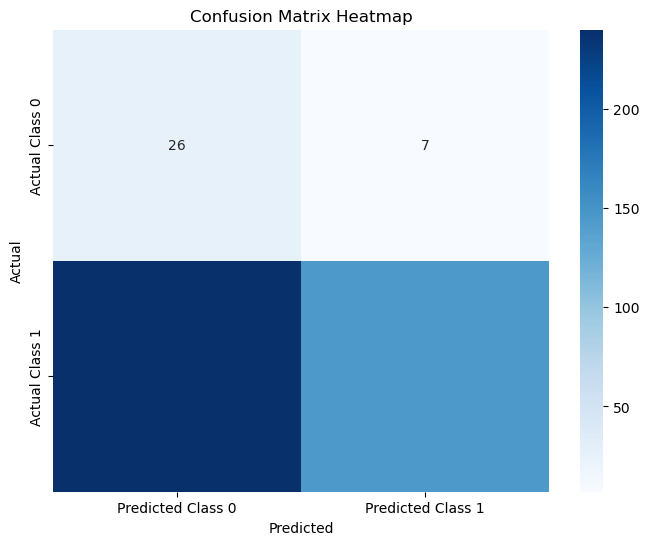

In [22]:
# Example confusion matrix data
confusion_matrix_data = {
    'Predicted Class 0': [26, 240],
    'Predicted Class 1': [7, 145]
}

# Convert the confusion matrix data to a DataFrame
df_confusion_matrix = pd.DataFrame(confusion_matrix_data, index=['Actual Class 0', 'Actual Class 1'])

# Plotting the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The confusion matrix summarizes the performance of a classification model on a test dataset. Here’s an interpretation of the given matrix:

The confusion matrix represented in a standard format with labels 0 and 1 for the classes:

\begin{array}{cc|c}
 & \text{Predicted Class 0} & \text{Predicted Class 1} \\
\hline
\text{Actual Class 0} & 26 & 240 \\
\text{Actual Class 1} & 7 & 145 \\
\end{array}

### Breakdown:
- **True Positives (TP)**: 145 — The model correctly predicted survival (actual = survived, predicted = survived).
- **True Negatives (TN)**: 26 — The model correctly predicted no survival (actual = not survived, predicted = not survived).
- **False Positives (FP)**: 240 — The model incorrectly predicted survival for individuals who did not survive.
- **False Negatives (FN)**: 7 — The model incorrectly predicted no survival for individuals who actually survived.

### Key Metrics:
1. **Accuracy**: The proportion of correct predictions to the total predictions.
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{145 + 26}{145 + 26 + 240 + 7} = \frac{171}{418} \approx 0.409
   $$
   This suggests the model is correct about 40.9% of the time.

2. **Precision (for survived)**: The proportion of true survival predictions among all survival predictions.
   $$
   \text{Precision} = \frac{TP}{TP + FP} = \frac{145}{145 + 240} \approx 0.377
   $$
   This means only 37.7% of those predicted to survive actually survived.

3. **Recall (Sensitivity for survived)**: The proportion of actual survivors correctly predicted.
   $$
   \text{Recall} = \frac{TP}{TP + FN} = \frac{145}{145 + 7} \approx 0.954
   $$
   The model identified 95.4% of actual survivors correctly.

4. **F1 Score**: The harmonic mean of precision and recall.
   $$
   \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \approx 2 \times \frac{0.377 \times 0.954}{0.377 + 0.954} \approx 0.541
   $$
   This indicates a moderate balance between precision and recall.

### Summary:
The model performs well in identifying survivors (high recall), but it struggles with precision, as many of its survival predictions are incorrect (high false positives). The overall accuracy of 40.9% suggests the model has limited reliability and may be biased towards predicting survival. Improvements could focus on reducing false positives by adjusting decision thresholds or refining the features used in the model.

### Evaluation metrics

In [20]:
# Metrics
accuracy = accuracy_score(y, predicted_classes)
precision = precision_score(y, predicted_classes)
recall = recall_score(y, predicted_classes)
f1 = f1_score(y, predicted_classes)
roc_auc = roc_auc_score(y, predicted_probs)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Evaluation Metrics:
Accuracy: 0.41
Precision: 0.38
Recall: 0.95
F1-Score: 0.54
ROC-AUC: 0.52


In [31]:
# classification report
class_rept = classification_report(y, predicted_classes)
#print(f"class_rept: {Classification report}")
print(class_rept)

              precision    recall  f1-score   support

           0       0.79      0.10      0.17       266
           1       0.38      0.95      0.54       152

    accuracy                           0.41       418
   macro avg       0.58      0.53      0.36       418
weighted avg       0.64      0.41      0.31       418



This classification report provides a detailed performance analysis of the logistic regression model based on precision, recall, F1-score, and support for each class (0 = did not survive, 1 = survived). 

### Class-Specific Performance:
1. **Class 0 (Did Not Survive)**:
   - **Precision (0.79)**: Of all the instances predicted as "did not survive," 79% were correct. This indicates the model is selective when predicting non-survivors.
   - **Recall (0.10)**: Only 10% of the actual "did not survive" cases were correctly predicted, suggesting the model fails to capture most non-survivors.
   - **F1-Score (0.17)**: The low F1-score reflects the poor balance between precision and recall for this class, with recall being the limiting factor.

2. **Class 1 (Survived)**:
   - **Precision (0.38)**: Of all the instances predicted as "survived," only 38% were correct. This reflects a high number of false positives.
   - **Recall (0.95)**: The model correctly identifies 95% of actual survivors, showing strong sensitivity for this class.
   - **F1-Score (0.54)**: The moderately high F1-score indicates a reasonable balance between precision and recall for survivors, driven by high recall.

### Metrics:
1. **Accuracy (0.41)**: The model is correct only 41% of the time, which is below an acceptable standard and suggests limited usefulness.
2. **Macro Average**:
   - Precision (0.58): The average precision across both classes, treating them equally, is moderate.
   - Recall (0.53): The average recall across both classes shows a slight bias towards identifying survivors better than non-survivors.
   - F1-Score (0.36): The low macro F1-score highlights that the model struggles with balancing precision and recall across both classes.
3. **Weighted Average**:
   - The weighted averages (precision: 0.64, recall: 0.41, F1-score: 0.31) account for the imbalance in the number of samples between classes. The weights favor the majority class (did not survive), but the low F1-score suggests poor performance overall.

### Summary:
The model heavily favors predicting survivors, achieving high recall (95%) for this class but at the cost of precision and overall accuracy. Its performance for predicting non-survivors is especially weak, with a recall of just 10%. This imbalance skews the model’s utility, making it unsuitable for real-world use without refinement. Addressing class imbalance (e.g., via oversampling, undersampling, or adjusting class weights) and feature engineering could improve the model's performance.

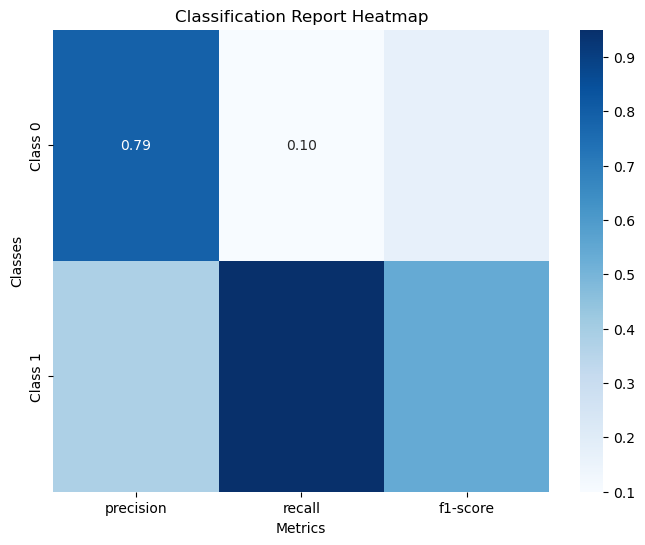

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Example classification report data
report_data = {
    'precision': [0.79, 0.38],
    'recall': [0.10, 0.95],
    'f1-score': [0.17, 0.54]
}

# Define the classes
classes = ['Class 0', 'Class 1']


# Convert the report data to a DataFrame
df_report = pd.DataFrame(report_data, index=classes)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


### **ROC curve**

An **ROC (Receiver Operating Characteristic) curve** is a graphical representation used to evaluate the performance of a classification model, particularly for binary classification tasks. It illustrates the trade-off between the **true positive rate (TPR)** and the **false positive rate (FPR)** at various threshold settings.

### Key Concepts:

1. **True Positive Rate (TPR):** Also known as sensitivity or recall, it is the proportion of actual positives correctly identified by the model.
   $$
   TPR = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

2. **False Positive Rate (FPR):** It is the proportion of actual negatives that are incorrectly classified as positives.
   $$
   FPR = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
   $$

3. **Threshold:** The decision boundary used by the classifier to assign labels. By varying this threshold, different points on the ROC curve are generated.

### Structure of the ROC Curve:
- The x-axis represents the **False Positive Rate (FPR)**.
- The y-axis represents the **True Positive Rate (TPR)**.
- A perfect classifier reaches the top-left corner (TPR=1, FPR=0).
- A random classifier produces a diagonal line from (0, 0) to (1, 1).

### Area Under the Curve (AUC):
- The **AUC** quantifies the overall ability of the model to discriminate between the classes.
- **AUC = 1.0:** Perfect classifier.
- **AUC = 0.5:** No discriminative power (equivalent to random guessing).
- **AUC < 0.5:** Worse than random guessing (usually indicates a reversed model).

### Importance of ROC Curve:
- It is threshold-independent, as it evaluates the classifier over all possible thresholds.
- It provides insight into the trade-offs between sensitivity and specificity for a model.
- Particularly useful when dealing with imbalanced datasets where the positive and negative classes are not equally represented.

### Example Use:
Suppose you are building a medical diagnostic model. The ROC curve helps you decide an appropriate threshold based on the acceptable trade-off between detecting true cases (TPR) and minimizing false alarms (FPR).

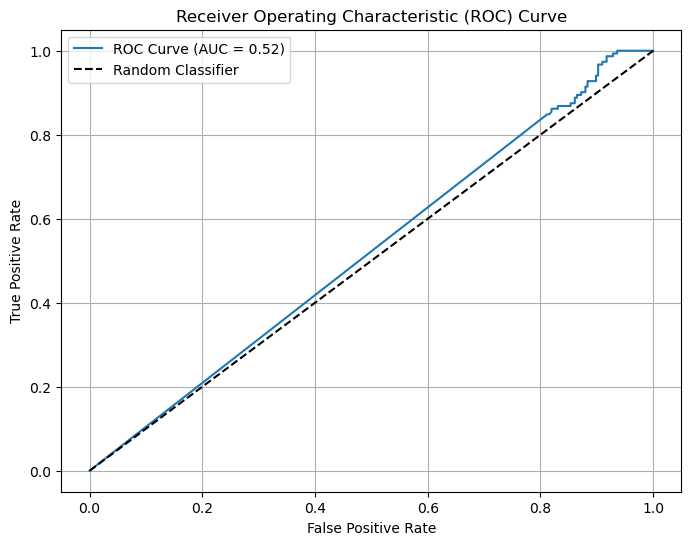

In [14]:
# ROC Curve
fpr, tpr, _ = roc_curve(y, predicted_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()


This is a Receiver Operating Characteristic (ROC) curve, which helps evaluate the performance of a classification model. Here's a summary:

1. **AUC Value**: The Area Under the Curve (AUC) is 0.52, which is slightly better than a random classifier (AUC = 0.5). This suggests the model has poor discriminatory power between classes.
   
2. **Dashed Line**: The dashed diagonal line represents the performance of a random classifier, where the true positive rate (TPR) equals the false positive rate (FPR).

3. **Blue Line**: The ROC curve of the model is very close to the diagonal, indicating the model's predictions are nearly equivalent to random guessing.

### Conclusion:
The model's performance is weak and may require improvements, such as feature engineering, hyperparameter tuning, or changing the classification algorithm.